This notebook focus on <b>Data Preparatoin and Analysis</b> <br>
Start by loading all csv files into python dataframes.

In [1]:
import pandas as pd
from datetime import datetime

try:
    df1 = pd.read_csv("1.csv")
    df2 = pd.read_csv("2.csv")
    df3 = pd.read_csv("3.csv")
    df4 = pd.read_csv("4.csv")

    df = pd.concat([df1, df2, df3, df4], ignore_index=True) #combine all dataframes into a single object.
except Exception as e:
    print(e)

Define a function to clean and transform date field

In [2]:
def parse_date(date_str):
    if pd.isna(date_str): #if field is empty
        return pd.NaT
    for fmt in ("%Y-%m-%d", "%d/%m/%Y"):
        try:
            return datetime.strptime(date_str.strip(), fmt)
        except:
            continue
    return pd.NaT

Transform all data fields into resepctive datatypes

In [3]:
df['SalePrice'] = pd.to_numeric(df['SalePrice'], errors='coerce')
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce', downcast='integer')
df['DateOfSale'] = df['DateOfSale'].apply(parse_date)

print(df.info()) #check datatype for each field
df.describe() #gives a standard descrption of whole data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Name            1654 non-null   object        
 1   SalePrice       1654 non-null   float64       
 2   DateOfSale      1654 non-null   datetime64[ns]
 3   Year            1654 non-null   int16         
 4   Mileage         1654 non-null   int64         
 5   Classification  1654 non-null   object        
 6   Transmission    1654 non-null   object        
 7   FuelType        1654 non-null   object        
 8   Description     1654 non-null   object        
 9   SaleLocation    1654 non-null   object        
dtypes: datetime64[ns](1), float64(1), int16(1), int64(1), object(6)
memory usage: 119.7+ KB
None


,SalePrice,DateOfSale,Year,Mileage
count,1654.000000,1654,1654.000000,1654.000000
mean,22220.982467,2024-06-30 12:38:18.428053504,2016.220073,52968.258162
min,1649.000000,2024-01-02 00:00:00,2008.000000,196.000000
25%,11150.250000,2024-04-04 00:00:00,2014.000000,23594.500000
50%,17946.000000,2024-07-02 12:00:00,2017.000000,46374.500000
75%,27443.750000,2024-09-27 00:00:00,2019.000000,76271.000000
max,205433.000000,2024-12-22 00:00:00,2022.000000,199119.000000
std,17131.188894,NaN,3.522282,36983.193343


<hr>
<h2>Data Analysis</h2>
<h3>1. <b>Price distribution:</b></h3>
 visualize price of all cars with respect to numbe of cars in form of histogram chart

 <h4>Observation:</h4> From the analysis it has been observed that most people tend to buy cars priced around 25000euro. As the price increases, the number of car sales decreases.

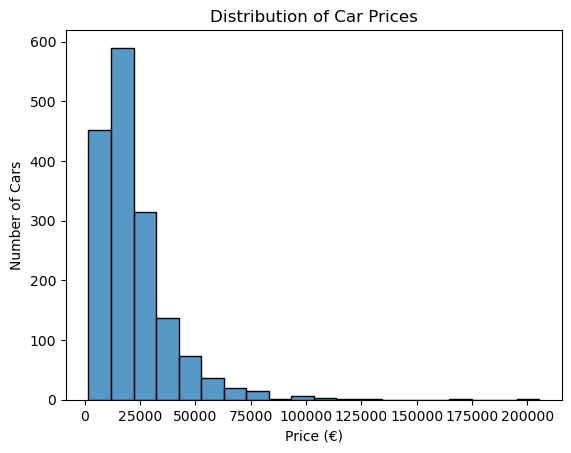

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['SalePrice'], bins=20) #plot histogram on the field 'SalePrice'
plt.title("Distribution of Car Prices") #title of the chart
plt.xlabel("Price (€)") #x-axis title
plt.ylabel("Number of Cars") #y-axis title
plt.show() #prints the graph

<h3>2. <b>Mileage vs Price:</b></h3>
Show how car price and mileage of car is connected
<h4>Observation:</h4>The scatter plot between Price and Mileage shows a negative correlation, as mileage increases, car prices tend to decrease.This proves that cars with higher usage (more miles driven) lose value over time.

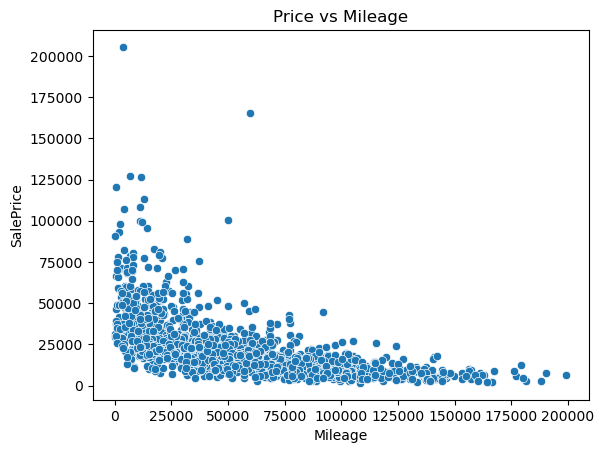

In [5]:
sns.scatterplot(x='Mileage', y='SalePrice', data=df)
plt.title("Price vs Mileage")
plt.show()

<h3>3. <b>Average Price per Car Brand:</b> </h3>
plot a bar chart which shows average price for each mannufacturer. <br>
create a new field called 'Brand' <br>

<h4>Observation:</h4>From this analysis, it is observed that brands such as Audi and BMW has the similar average prices while the brand mercedes-benz has highest average price.

Brand
mercedes-benz    24320.676573
audi             23194.769231
bmw              23176.984127
volkswagen       15726.531561
Name: SalePrice, dtype: float64


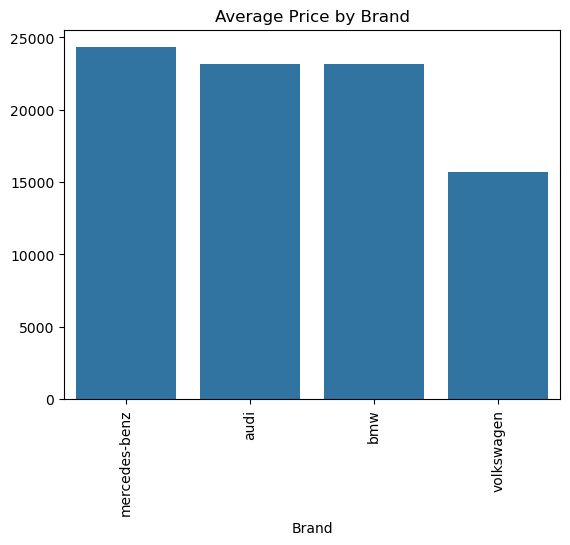

In [6]:
df['Brand'] = df['Name'].apply(lambda x: x.split()[0]) #get brand name and save it to new field
brand_price = df.groupby('Brand')['SalePrice'].mean().sort_values(ascending=False) #get average price for all brands
print(brand_price)

sns.barplot(x=brand_price.index, y=brand_price.values) #plot barchart for avg price and brand
plt.xticks(rotation=90)
plt.title("Average Price by Brand")
plt.show()

<h3>4. <b>Count of Cars per Classification:</b> </h3>
plot a chart to show count of cars on the basis of classifcation
<h4>Observation:</h4>The majority of cars in the dataset fall under the Hatchback and SUV categories, indicating that these are the most common or popular car types in the market.

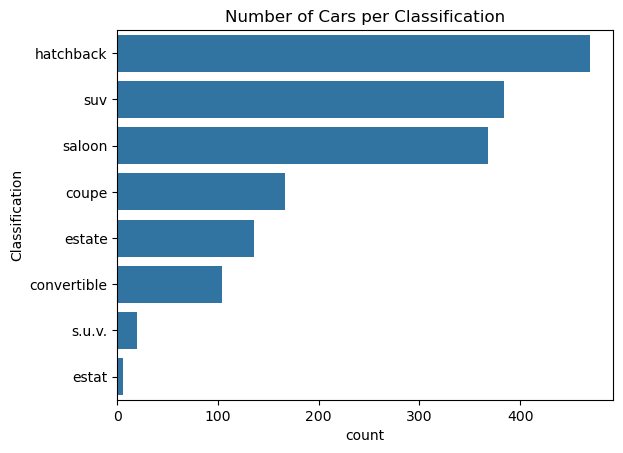

In [7]:
sns.countplot(y='Classification', data=df, order=df['Classification'].value_counts().index)
plt.title("Number of Cars per Classification")
plt.show()

<hr>
<h2>Discussion Section</h2>
<h3>1. Challenges Faced:</h3>
<ul>
    <li><b>Inconsistent Date Format:</b> The date field had two different types: dd/mm/yyyy and yyyy-mm-dd, which required parsing logic to clean it.</li>
    <li><b>Irregular Mileage Entries:</b> Some mileage fields had the word 'miles' in them while some did not have it, which needed data cleaning.</li>
    <li><b>Price Formatting Issue:</b> The price field had a currency symbol in some values which needed to be removed along with commas to convert it into float values.</li>
    <li><b>Pagination Handling:</b> The website had 4 car brands, and each brand had pagination which needed to be addressed.</li>
    <li><b>Parsing HTML for Each Car Detail:</b> The HTML for car details had a heading followed by a table, which then both needed to be combined into a single data list.</li>
</ul>

<h3>2. Key Insights:</h3>
<ul>
    <li>Expensive cars have less mileage, which is considered a good factor for a second-hand car.</li>
    <li>The leading car categories are Hatchback and SUV.</li>
    <li>Mercedes-Benz is the most expensive brand, while Volkswagen has the lowest average price.</li>
    <li>Most cars were sold around a price point of €25,000.</li>
</ul>

<h3>3. Further Work:</h3>
The current analysis could be extended in several ways:
<ul>
    <li>Adding extra data to the set. For example, adding data about fuel efficiency and customer ratings can enhance the insights.</li>
    <li>Building a regression or machine learning model to predict car prices based on factors such as year, brand, mileage, etc.</li>
    <li>It can be analyzed how car prices evolve over time.</li>
    <li>Cars can be grouped into luxury, budget, and mid-range categories.</li>
</ul>